# Home Work 2 - Solutions 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import ttest_1samp

## Question 1

### 1A
Since the time gap between two consecutive readings is $T_s$ = 0.05s, the sampling frequency is given by $F_s = \frac{1}{T_s}$. Using this relation here we get $F_s = \frac{1}{0.05}$ = 20 Hz

In [2]:
readings = pd.read_csv('hw2.csv',header=None) #Don't consider first row as header

In [3]:
def plot_signals(readings):
    plt.plot(np.arange(-5,5.03,0.05),readings)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (v)')
    plt.show()

### 1b

In [4]:
readings.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.53767,1.833900,-2.25880,0.86217,0.31877,-1.307700,-0.43359,0.34262,3.57840,2.76940,-1.34990,3.034900,0.72540,-0.063055,0.714740,-0.20497,-0.124140,1.48970,1.40900,1.41720
1,0.67150,-1.207500,0.71724,1.63020,0.48889,1.034700,0.72689,-0.30344,0.29387,-0.78728,0.88840,-1.147100,-1.06890,-0.809500,-2.944300,1.43840,0.325190,-0.75493,1.37030,-1.71150
2,-0.10224,-0.241450,0.31921,0.31286,-0.86488,-0.030051,-0.16488,0.62771,1.09330,1.10930,-0.86365,0.077359,-1.21410,-1.113500,-0.006849,1.53260,-0.769670,0.37138,-0.22558,1.11740
3,-1.08910,0.032557,0.55253,1.10060,1.54420,0.085931,-1.49160,-0.74230,-1.06160,2.35050,-0.61560,0.748080,-0.19242,0.888610,-0.764850,-1.40230,-1.422400,0.48819,-0.17738,-0.19605
4,1.41930,0.291580,0.19781,1.58770,-0.80447,0.696620,0.83509,-0.24372,0.21567,-1.16580,-1.14800,0.104870,0.72225,2.585500,-0.666890,0.18733,-0.082494,-1.93300,-0.43897,-1.79470


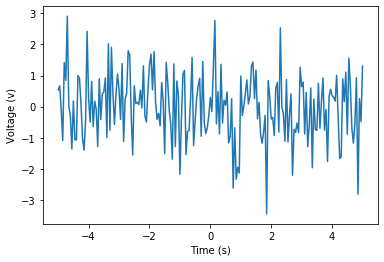

In [5]:
#Using Pandas Data Frames to Plot
first_reading = readings[0]
plot_signals(first_reading)

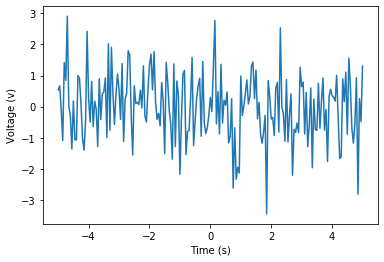

In [6]:
#First Reading using Numpy
readings_numpy = readings.to_numpy()
first_reading = readings_numpy[:,0]
plot_signals(first_reading)

### 1c

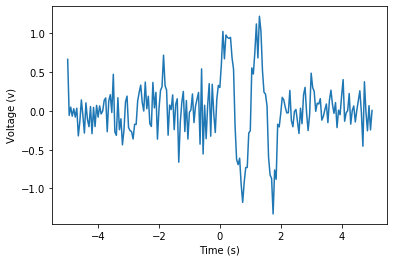

In [7]:
#Using Pandas Data Frames to Plot
mean_readings = readings.mean(axis=1)
plot_signals(mean_readings)

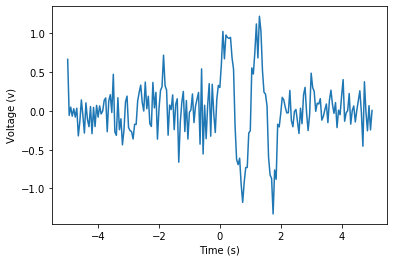

In [8]:
#Average Reading using Numpy
mean_reading = np.mean(readings_numpy,axis=1)
plot_signals(mean_reading)

### 1D

The Null and Alternate Hypothesis for this problem are

$H_0$ : The ERP for the reading at -5s is zero

$H_a$ : There is a non-zero ERP activity at -5s

In [9]:
#Choose -5s reading for all the trials
ttest_result = ttest_1samp(readings_numpy[0,:],0) 
print("Pvalue for the first reading is: {}".format(ttest_result.pvalue))

Pvalue for the first reading is: 0.059006248858939694


As the Pvalue is greater than 0.05 we can cannot reject the null hypothesis. Because the chance of alternate hypothesis being an aberration is not small enough. Hence it could just an aberration of the null hypothesis.

### 1 E - T Test for each sample across trials


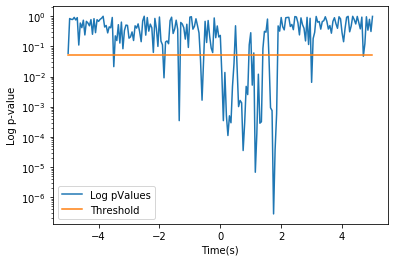

In [10]:
pvalues = np.zeros(201) #Container for pValues
for time_stamp in range(201):
    pvalues[time_stamp] = ttest_1samp(readings_numpy[time_stamp,:],0).pvalue

plt.semilogy(np.arange(-5,5.03,0.05),pvalues)
plt.semilogy(np.arange(-5,5.05,0.05),0.05*np.ones(201))
plt.xlabel('Time(s)')
plt.ylabel('Log p-value')
plt.legend(['Log pValues','Threshold'])
plt.show()

### 1 F - Significant ERP for first 100 samples

In [11]:
first_100_readings = pvalues[:100] #Choose first 100 pValues
first_100_readings.shape

(100,)

In [12]:
 #Generate Time signals for -5s ,0s
first_100_timings = np.arange(-5,0,0.05)
erp_detection_time = first_100_timings[first_100_readings < 0.05]
print("Total Number of Events detected for first 100 readings is ",len(erp_detection_time))

Total Number of Events detected for first 100 readings is  6


### 1G - Number of Significant ERP for last 100 samples - Post Stimulus Response

In [13]:
#Reading last 100 values
last_100_readings = pvalues[101:] 
last_100_readings.shape

(100,)

In [14]:
last_100_timings = np.arange(0.05,5.03,0.05)
erp_detection_time = last_100_timings[last_100_readings < 0.05]
print("Total Number of Events detected for last 100 readings is",len(erp_detection_time))

Total Number of Events detected for last 100 readings is 31


### 1 H 

Choosing the default value of pValue = 0.05 we can roughly calculate the number of false positives which indicates the chance of tolerating a significant activity in the reading when there are none. This is given by

Total False Positives = Total Readings * pValue

Total False Positives = 201 * 0.05 = 10.05

Let us consider the results from section F and G. For section F and G the total number of events that we classify as significant is 31+6 = 37. And we observe that this number is greater than the tolerable false positive number of 10.05. Which could mean thatn the data implies that the null hypothesis be rejected in favor of alternate hypothesis. Hence we can conclude there is indeed a response to the stimulus observed in the data.

But if we apriori knew that there was no real ERP then the result obtained will be unacceptable. The observed significant events cannot be considered as the false negatives actually showing up in the experiments. Because significant activity detection for 37 times when the tolerance is just 10.05 could mean that there could be something wrong with the data showing up from the experiment.


### 1 I 

The Bonferroni-Correction for threshold pValue is given by $\frac{\alpha}{N}$, Where $\alpha$ is the original threshold used and N is the total number of T tests conducted. Hence using this relation we have $\alpha_c$ = $\frac{0.05}{201}$ = 0.0002487562189054727 

For more understanding of Bonferroni-Correction Read https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf

In [15]:
pValue_corrected = 0.05 / 201
first_100_timings = np.arange(-5,0,0.05)
erp_detection_time = first_100_timings[first_100_readings < pValue_corrected]
print("Total Number of Events detected for first 100 readings is ",len(erp_detection_time))

Total Number of Events detected for first 100 readings is  0


This means that there was no activity observed in the first 100 readings which is a pre-stimulus period. And this number being zero proves that the tighter bound is helping not discarding Null Hypothesis when it was true.

In [16]:
last_100_timings = np.arange(0.05,5.03,0.05)
erp_detection_time = last_100_timings[last_100_readings < pValue_corrected]
print("Total Number of Events detected for last 100 readings is",len(erp_detection_time))

Total Number of Events detected for last 100 readings is 6


## Question 2 Complex Fourier Signal Analysis

### 2a

Expression for the complex fourier series is 
$$
f(t) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega t}
$$

Taking conjugate on both sides we have 

$$
f^*(t) = \sum_{n=-\infty} ^{\infty} c_n^* e^{-in\omega t}
$$

Because conjugate of $e^{ix}$ is $e^{-ix}$. Next substitute $-n = n$ in the above equation.

$$
f^*(t) = \sum_{n=-\infty} ^{\infty} c_{-n}^* e^{in\omega t}
$$



### 2b If $f(t)$ was real

From the above result we have equation for conjugate complex fourier series and also complex fourier series. And we also know that for a real function $f(t) = f^*(t) $ Hence to find the constraint on the frequency coefficents $c_n$ we use the results from question 2a.

We know that for real signals the complex part is zero which can written as $f(t) = f^*(t)$

Comparing (1) 

$$
f(t) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega t}
$$

and (2)

$$
f^*(t) = \sum_{n=-\infty} ^{\infty} c_{-n}^* e^{in\omega t}
$$

We can easily see that the exponent term for (1) and (2) are the same and hence we can say that $c_{-n}^* = c_n$

### 2c: If $f(t)$ was even 

Again using the results from 2a and substituting $f(t) = f(-t)$

Result from 2a (1)

$$
f(t) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega t}
$$

We get (2)

$$
f(-t) = \sum_{n=-\infty} ^{\infty} c_{n} e^{-in\omega t} 
$$ 

Again like in 2b substitute $-n = n$

We get (3)

$$
f(-t) = \sum_{n=-\infty} ^{\infty} c_{-n} e^{in\omega t} 
$$ 

Now compare (1) and (3) we get $c_{-n} = c_{n}$



### 2d: If $f(t)$ was both real and even

This means we can combine the results of part 2c,2b for the conditions obtained on $c_n$

We need (1) $c_{-n}* = c_n$ and (2)  $c_{-n} = c_{n}$ be true

Which means that $c_{-n} = c^*_{-n}$ or $c_{n} = c^*_{n}$ as n spans from $(-\infty,\infty)$

This means that the coefficients $c_n$ are real.

## Question 3 

Given that $x(t)$ has fourier series of $c_n$ then we can write the complex fourier series as

$$
x(t) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega t}
$$

Now we can write the fourier series for $x(t-\tau)$ as

$$
x(t - \tau) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega (t-\tau)}
$$

which can futher be written as 

$$
x(t - \tau) = \sum_{n=-\infty} ^{\infty} c_n e^{in\omega t} e^{-in\omega \tau}
$$

Hence we can say that the fourier series coefficients of $x(t-\tau)$ is $c_n e^{-in\omega \tau}$



## Question 4

The signal has sampling frequency of $F_s$ = 512Hz and the duration of the signal is 2 minutes. 

### 4a Find N, T and dt

N is the number of samples that we have and T is the total duration of the signal and dt is the time detween two consecutive samples.

We know that sampling frequency is the number of samples per second. Here it is equal to 512 Hz. Therefore if the signal is of length 2 mins which has 120 seconds then we have total number samples(N) equal to 512*120 = 61440 samples.

T is the time duration of the signal which here is 120 seconds.

dt is the time duration between two consecutive samples which can be calculted by using the equation $dt = \frac{1}{F_s}$. Substituiting the value in this equation we have dt = 0.001953125 seconds

### 4b Total Length of the Frequency components

The DFT for a signal of length N we have a fourier frequency component equal to N. That is equal to 61440 frequency components can be calculated for the given time domain signal.

### 4c Minimum Frequency Component for the Signal

From the hint we know that the least frequency will correspond to $k=1$. And the value of each frequency can be calculated using the formula 
$$
f = \frac{k}{T}
$$

Where $k \in [0,N-1]$ and T is the total length of the signal. Therefore the minimum frequency can be calculated as 

$$
f = \frac{1}{120} = 0.00833 
$$

Hence the minimum frequency $f = 0.008333$ Hz

### 4d Maximum Frequency Component that can be estimated

We know that the sampling rate should be always twice as large as that of the signal frequency for proper signal recovery. Since here the sampling frequency is already fixed to 512Hz we can compute the maximum signal frequency that can be measured without aliasing by using the formula

$$
F_s = F_{max} * 2
$$

Where $F_s$ is the sampling frequency ansor this can also be written as

$$
F_{max} = \frac {F_{s}}{ 2}
$$


$$
F_{max} = \frac {512}{ 2}
$$

Hence $F_{max}$ is equal to 256 Hz

### 4e Get the minimum sequence of data to perform Gamma band analysis

Here the frequency component we are interested is 41.5Hz and 42.5Hz. As the frequencie s observed in the DFT signal occur in multiples of fundamental frequencies. We know the relation between the total time duration of signal $T$ is related to the frequency resolution of the frequency domain signal by  (1)

$$
\delta f = \frac {1} {T}
$$

Rewriting (1) as (2)
$$
T = \frac {1} {\delta f}
$$


Here we have $ \delta f$ = 1 Hz because the frequency range we are interested in is 42.5 - 41.5 Hz = 1 Hz. Using equation (2) we have the solution for total time range for the signal as  T = 1s.